# Predicting heart disease

## Problem Description:

Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.

In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease. According to their website:


- About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
- Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
- Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
- Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
- Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.


## Goal of the analysis:

- Goal is to predict the binary class **heart_disease_present**, which represents whether or not a patient has heart disease.
    - **0** represents no heart disease present
    - **1** represents heart disease present

## Dataset description:

There are 14 columns in the dataset, where the **patient_id** column is a unique and random identifier. The remaining 13 features are described in the section below.

- **slope_of_peak_exercise_st_segment (type: int):** the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
- **thal (type: categorical):** results of thallium stress test measuring blood flow to the heart, with possible values **normal**, **fixed_defect**, **reversible_defect**
- **resting_blood_pressure (type: int):** resting blood pressure
- **chest_pain_type (type: int):** chest pain type (4 values)
- **num_major_vessels (type: int):** number of major vessels (0-3) colored by flourosopy
- **fasting_blood_sugar_gt_120_mg_per_dl (type: binary):** fasting blood sugar > 120 mg/dl
- **resting_ekg_results (type: int):** resting electrocardiographic results (values 0,1,2)
- **serum_cholesterol_mg_per_dl (type: int):** serum cholestoral in mg/dl
- **oldpeak_eq_st_depression (type: float):** oldpeak = ST depression induced by exercise relative to - rest, a measure of abnormality in electrocardiograms
- **sex (type: binary):** 0: female, 1: male
- **age (type: int):** age in years
- **max_heart_rate_achieved (type: int):** maximum heart rate achieved (beats per minute)
- **exercise_induced_angina (type: binary):** exercise-induced chest pain (0: False, 1: True)

In [1]:
# Install necessary packages

#install.packages('ggplot2')
#install.packages('dplyr')
#install.packages('tidyr')
#install.packages('ggcorrplot')

### 1. Load datasets

In [2]:
# Load datasets
Train_hd <- read.csv('train_values.csv', header=T)
Train_hd_labels <- read.csv('train_labels.csv', header=T)
Test_hd <- read.csv('test_values.csv', header=T)

In [3]:
# Inspect first 6 rows of data
head(Train_hd)

patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0


In [4]:
# Let's explore the structure of the dataset
str(Train_hd)

'data.frame':	180 obs. of  14 variables:
 $ patient_id                          : Factor w/ 180 levels "02cipp","08usun",..: 7 148 173 113 134 117 21 72 29 12 ...
 $ slope_of_peak_exercise_st_segment   : int  1 2 1 1 3 1 2 2 3 2 ...
 $ thal                                : Factor w/ 3 levels "fixed_defect",..: 2 2 2 3 3 2 3 1 3 2 ...
 $ resting_blood_pressure              : int  128 110 125 152 178 130 150 150 170 120 ...
 $ chest_pain_type                     : int  2 3 4 4 1 3 4 4 4 3 ...
 $ num_major_vessels                   : int  0 0 3 0 0 0 2 1 0 0 ...
 $ fasting_blood_sugar_gt_120_mg_per_dl: int  0 0 0 0 0 0 0 0 0 0 ...
 $ resting_ekg_results                 : int  2 0 2 0 2 0 2 2 2 0 ...
 $ serum_cholesterol_mg_per_dl         : int  308 214 304 223 270 180 258 276 326 219 ...
 $ oldpeak_eq_st_depression            : num  0 1.6 0 0 4.2 0 2.6 0.6 3.4 1.6 ...
 $ sex                                 : int  1 0 1 1 1 1 0 1 1 0 ...
 $ age                                 : int  45 54 

In [5]:
# Find if there are any missing values in the dataset

na_count <- sapply(Train_hd, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
,<int>
patient_id,0
slope_of_peak_exercise_st_segment,0
thal,0
resting_blood_pressure,0
chest_pain_type,0
num_major_vessels,0
fasting_blood_sugar_gt_120_mg_per_dl,0
resting_ekg_results,0
serum_cholesterol_mg_per_dl,0


There seems to be no missing values

In [6]:
# Combine add labels to Train_hd dataset

train <- merge(Train_hd, Train_hd_labels, by= c('patient_id'))
head(train)


patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
02cipp,1,normal,140,1,2,0,0,239,1.8,0,69,151,0,0
08usun,1,reversible_defect,120,4,0,0,0,177,0.4,1,65,140,0,0
0g192k,2,reversible_defect,128,4,1,0,0,263,0.2,1,64,105,1,0
0n5fu0,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
0ryxtv,2,normal,102,4,0,0,2,265,0.6,0,42,122,0,0
0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [7]:
#write.csv(train, 'heart_disease.csv', row.names=FALSE)

In [8]:
# Find if there are any missing values in the merged dataset

na_count <- sapply(train, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
,<int>
patient_id,0
slope_of_peak_exercise_st_segment,0
thal,0
resting_blood_pressure,0
chest_pain_type,0
num_major_vessels,0
fasting_blood_sugar_gt_120_mg_per_dl,0
resting_ekg_results,0
serum_cholesterol_mg_per_dl,0


### 2. Exploratory Data Analysis

In [9]:
# Let's rename values of a column for data exploration purposes

## First create a copy of train
train_copy <- train
train_copy$sex[train_copy$sex == 0] <- 'female'
train_copy$sex[train_copy$sex == 1] <- 'male'
train_copy$heart_disease_present[train_copy$heart_disease_present == 1] <- 'yes'
train_copy$heart_disease_present[train_copy$heart_disease_present == 0] <- 'no'
head(train_copy)

patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<chr>
02cipp,1,normal,140,1,2,0,0,239,1.8,female,69,151,0,no
08usun,1,reversible_defect,120,4,0,0,0,177,0.4,male,65,140,0,no
0g192k,2,reversible_defect,128,4,1,0,0,263,0.2,male,64,105,1,no
0n5fu0,1,normal,180,4,0,0,0,325,0.0,female,64,154,1,no
0ryxtv,2,normal,102,4,0,0,2,265,0.6,female,42,122,0,no
0xw93k,1,normal,124,3,2,1,0,255,0.0,male,48,175,0,no


In [10]:
# Heart disease by gender

nrow(train_copy)
addmargins(table(train_copy$sex, train_copy$heart_disease_present))

[1] 180

,no,yes,Sum
female,45,11,56
male,55,69,124
Sum,100,80,180


- Number of male patients with heart disease is higher compared to female

In [11]:
# Row-wise proportions
round(prop.table(table(train_copy$sex, train_copy$heart_disease_present), margin=1),2)

        
           no  yes
  female 0.80 0.20
  male   0.44 0.56

In [12]:
min(train$age)
max(train$age)

[1] 29

[1] 77

The ratio of heart disease distribution among female:male seems to higher for male

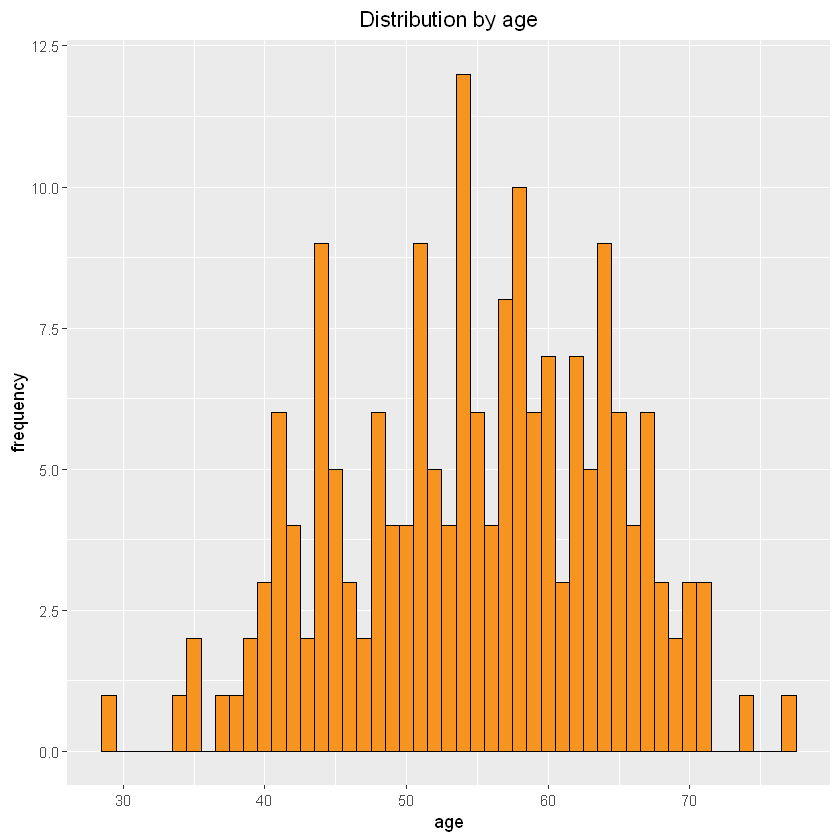

In [13]:
# Let's see the distribution of age in the dataset

library(ggplot2)

ggplot(aes(x=age), data=train) +
    geom_histogram(binwidth=1, color='black', fill = "#F79420") +
    xlab('age') +
    ylab('frequency') +
    ggtitle('Distribution by age') +
    theme(plot.title=element_text(hjust=0.5))

Most patients are falling in the age range of 45-65

In [14]:
summary(train)

   patient_id  slope_of_peak_exercise_st_segment                thal   
 02cipp :  1   Min.   :1.00                      fixed_defect     : 8  
 08usun :  1   1st Qu.:1.00                      normal           :98  
 0g192k :  1   Median :1.00                      reversible_defect:74  
 0n5fu0 :  1   Mean   :1.55                                            
 0ryxtv :  1   3rd Qu.:2.00                                            
 0xw93k :  1   Max.   :3.00                                            
 (Other):174                                                           
 resting_blood_pressure chest_pain_type num_major_vessels
 Min.   : 94.0          Min.   :1.000   Min.   :0.0000   
 1st Qu.:120.0          1st Qu.:3.000   1st Qu.:0.0000   
 Median :130.0          Median :3.000   Median :0.0000   
 Mean   :131.3          Mean   :3.156   Mean   :0.6944   
 3rd Qu.:140.0          3rd Qu.:4.000   3rd Qu.:1.0000   
 Max.   :180.0          Max.   :4.000   Max.   :3.0000   
                  

### Understanding blood pressure

Blood pressure refers to the force exerted by circulating blood on the walls of blood vessels and constitutes one of the principal vital signs.

The pressure of the circulating blood decreases as blood moves through arteries, arterioles, capillaries, and veins. The term blood pressure generally refers to arterial pressure, i.e., the pressure in the larger arteries, arteries being the blood vessels which take blood away from the heart.

Blood pressure is always given as two numbers;

- Systolic Pressure (when the heart beats)
- Diastolic Pressure (when the heart relaxes)

When the measurements are written down, both are written one above, or before, the other with the systolic being the first number. Normal blood pressure will be in the range 120/80.

***Blood pressure is not the same as maximum heart rate(pulse)***

Heart rate differs by age.

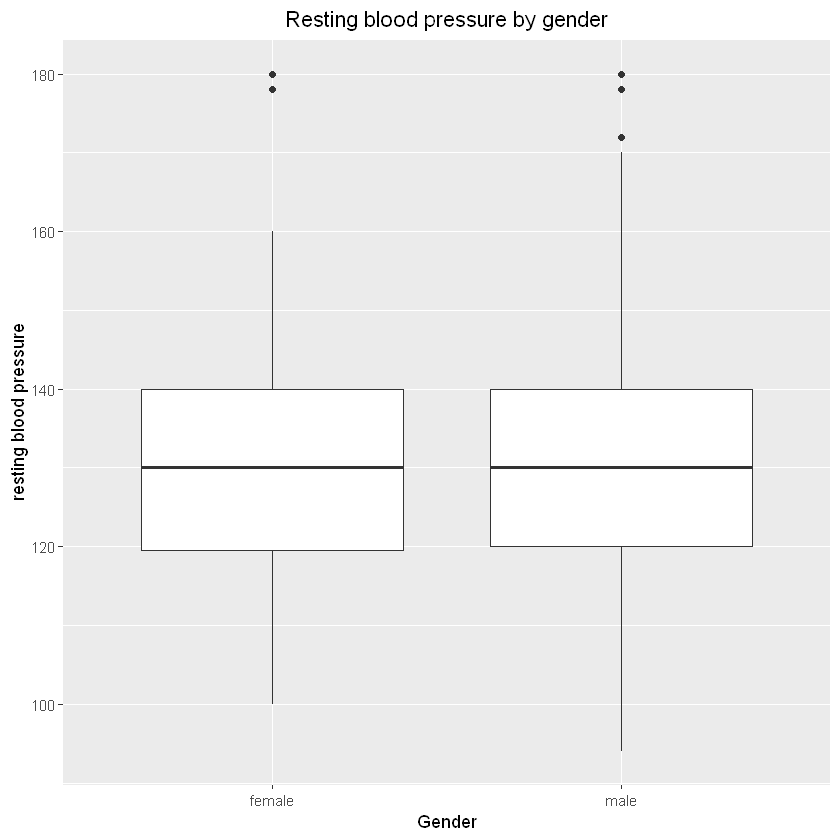

In [15]:
# Resting blood pressure distribution by gender

library(ggplot2)

ggplot(data=train_copy, aes(x=sex, y=resting_blood_pressure)) +
    geom_boxplot() +
    xlab('Gender') +
    ylab('resting blood pressure') +
    ggtitle('Resting blood pressure by gender') +
    theme(plot.title=element_text(hjust=0.5))

The median resting blood pressure seems to be equal and high for both the genders

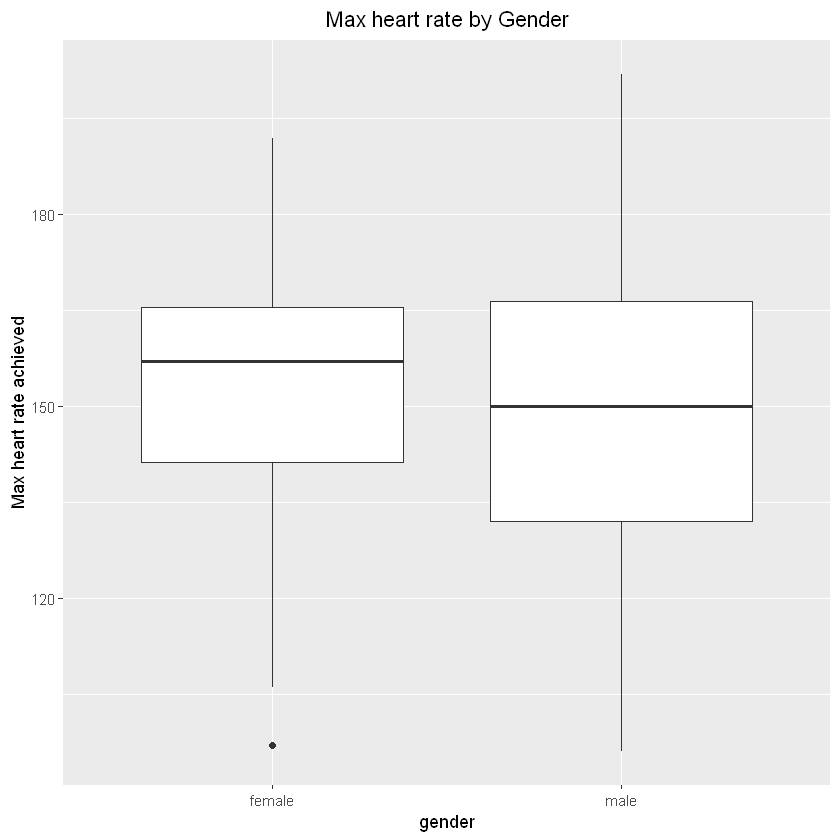

In [16]:
# Max heart rate by gender

library(ggplot2)

ggplot(aes(x=sex, y=max_heart_rate_achieved), data=train_copy) +
    geom_boxplot() +
    xlab('gender') +
    ylab('Max heart rate achieved') +
    ggtitle('Max heart rate by Gender') +
    theme(plot.title=element_text(hjust=0.5)) 

Max heart rate is high in females compared to males

In [17]:
min(train_copy$age)
max(train_copy$age)

[1] 29

[1] 77

In [18]:
# Adding age ranges
train_copy$age_range <- ifelse(train_copy$age<20,'1-20',
                              ifelse(train_copy$age>20 & train_copy$age<=30,'21-30',
                              ifelse(train_copy$age>30 & train_copy$age<=40,'31-40',
                              ifelse(train_copy$age>40 & train_copy$age<=50,'41-50',
                              ifelse(train_copy$age>50 & train_copy$age<=60,'51-60',
                              ifelse(train_copy$age>60 & train_copy$age<=70,'61-70',
                              ifelse(train_copy$age>70 & train_copy$age<=80,'71-80',
                              ifelse(train_copy$age>80 & train_copy$age<=90,'81-90','>90'))))))))

head(train_copy)

patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,age_range
<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>
02cipp,1,normal,140,1,2,0,0,239,1.8,female,69,151,0,no,61-70
08usun,1,reversible_defect,120,4,0,0,0,177,0.4,male,65,140,0,no,61-70
0g192k,2,reversible_defect,128,4,1,0,0,263,0.2,male,64,105,1,no,61-70
0n5fu0,1,normal,180,4,0,0,0,325,0.0,female,64,154,1,no,61-70
0ryxtv,2,normal,102,4,0,0,2,265,0.6,female,42,122,0,no,41-50
0xw93k,1,normal,124,3,2,1,0,255,0.0,male,48,175,0,no,41-50


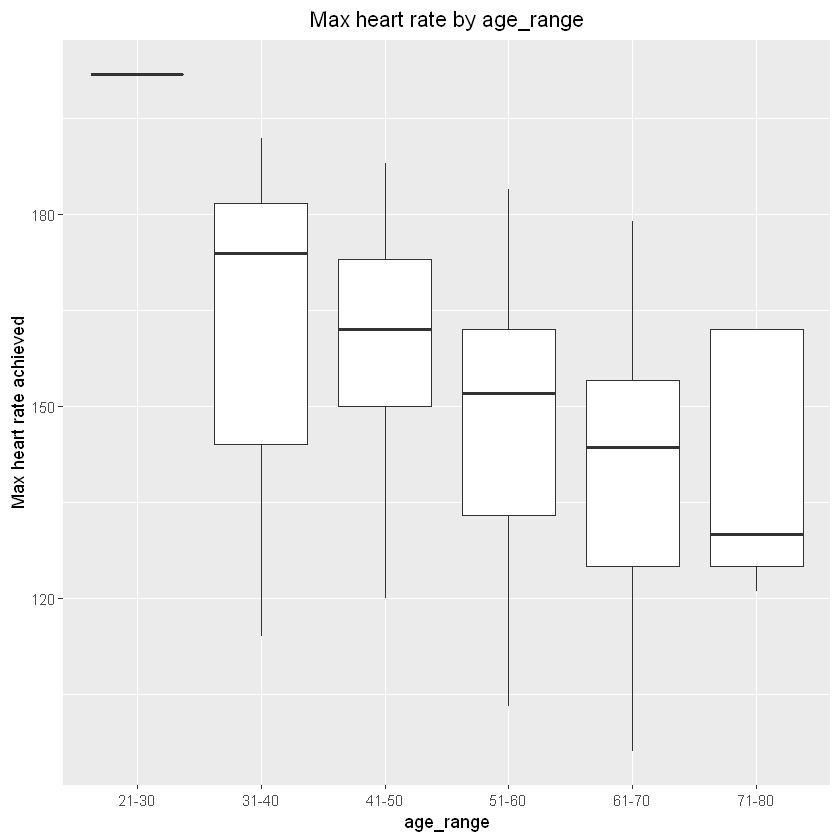

In [19]:
# Max rate heart rate by age_group

library(ggplot2)

ggplot(aes(x=age_range, y=max_heart_rate_achieved), data=train_copy) +
    geom_boxplot() +
    xlab('age_range') +
    ylab('Max heart rate achieved') +
    ggtitle('Max heart rate by age_range') +
    theme(plot.title=element_text(hjust=0.5)) 

- Max heart rate is consistently decreasing by age

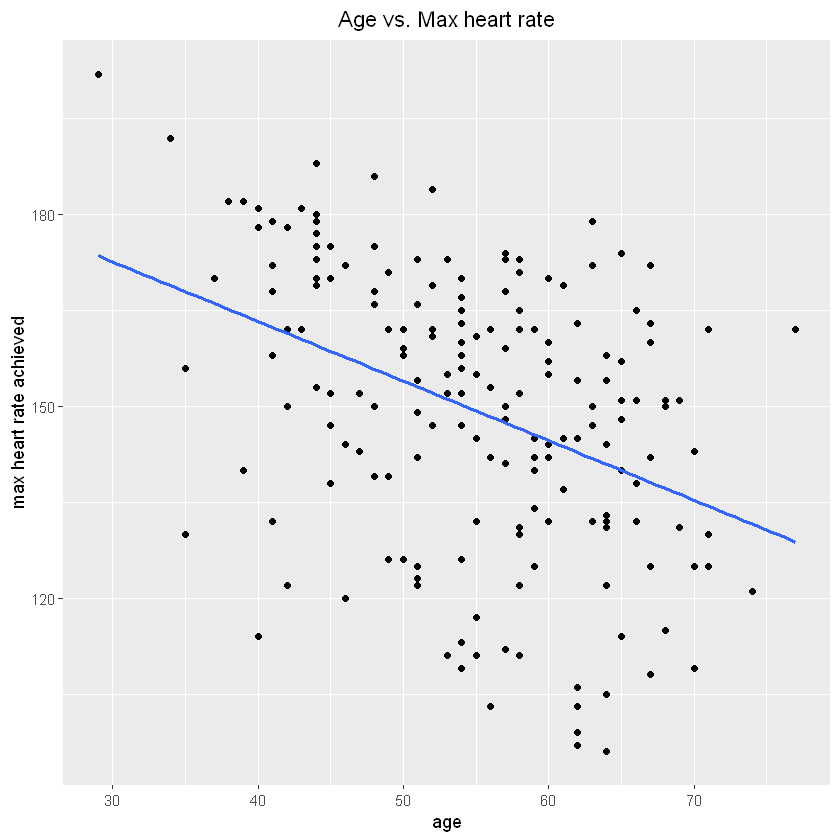

In [20]:
# How is age related with max heart rate?

library(ggplot2)

ggplot(aes(x=age, y=max_heart_rate_achieved), data=train_copy) +
    geom_point(shape=19) +
    geom_smooth(method=lm, se=FALSE) +
    xlab('age') +
    ylab('max heart rate achieved') +
    ggtitle('Age vs. Max heart rate') +
    theme(plot.title=element_text(hjust=0.5))

- Max heart rate seems to be negatively correlated with age and it is not a strong correlation

In [21]:
# Compute correlation matrix

names(train)
db_cor <- round(cor(train[c(2,4:15)]),2)
db_cor

[1] "patient_id"                          
 [2] "slope_of_peak_exercise_st_segment"   
 [3] "thal"                                
 [4] "resting_blood_pressure"              
 [5] "chest_pain_type"                     
 [6] "num_major_vessels"                   
 [7] "fasting_blood_sugar_gt_120_mg_per_dl"
 [8] "resting_ekg_results"                 
 [9] "serum_cholesterol_mg_per_dl"         
[10] "oldpeak_eq_st_depression"            
[11] "sex"                                 
[12] "age"                                 
[13] "max_heart_rate_achieved"             
[14] "exercise_induced_angina"             
[15] "heart_disease_present"

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.00,0.10,0.12,0.08,0.05,0.17,-0.03,0.62,0.09,0.17,-0.42,0.23,0.34
resting_blood_pressure,0.10,1.00,-0.03,0.04,0.17,0.08,0.14,0.22,-0.06,0.28,-0.02,0.12,0.08
chest_pain_type,0.12,-0.03,1.00,0.25,-0.09,0.03,0.06,0.08,0.09,0.09,-0.30,0.35,0.41
num_major_vessels,0.08,0.04,0.25,1.00,0.17,0.10,0.10,0.21,0.07,0.35,-0.28,0.15,0.42
fasting_blood_sugar_gt_120_mg_per_dl,0.05,0.17,-0.09,0.17,1.00,0.05,0.03,-0.04,0.07,0.18,0.06,-0.01,0.00
resting_ekg_results,0.17,0.08,0.03,0.10,0.05,1.00,0.17,0.10,0.05,0.13,-0.10,0.04,0.15
serum_cholesterol_mg_per_dl,-0.03,0.14,0.06,0.10,0.03,0.17,1.00,-0.02,-0.15,0.24,-0.07,0.08,0.08
oldpeak_eq_st_depression,0.62,0.22,0.08,0.21,-0.04,0.10,-0.02,1.00,0.10,0.19,-0.34,0.25,0.38
sex,0.09,-0.06,0.09,0.07,0.07,0.05,-0.15,0.10,1.00,-0.15,-0.05,0.25,0.34
age,0.17,0.28,0.09,0.35,0.18,0.13,0.24,0.19,-0.15,1.00,-0.39,0.08,0.14


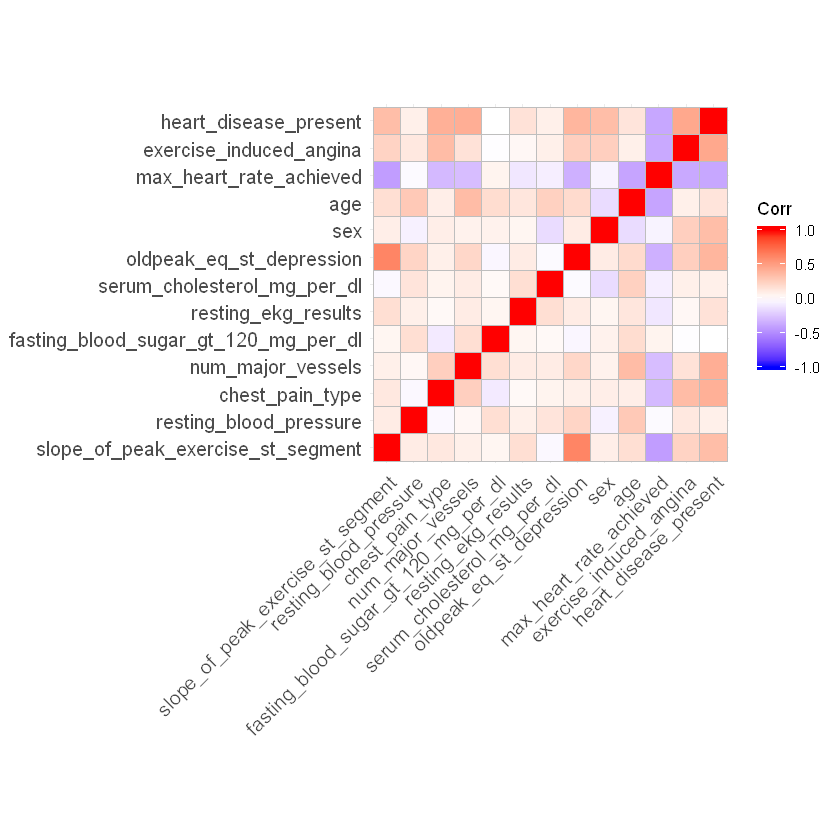

In [22]:
library(ggcorrplot)
ggcorrplot(db_cor)

- Looking at the correlation matrix, none of these variables seems to be strong predictors of heart disease.

### What does thalium stress test indicate about heart disease?

- A thallium stress test is a nuclear imaging test that shows how well blood flows into your heart while you’re exercising or at rest. This test is also called a cardiac or nuclear stress test.
- The thallium stress test can show:
    - the size of your heart chambers
    - how effectively your heart pumps —that is, its ventricular function
    - how well your coronary arteries supply your heart with blood, known as myocardial perfusion
    - if your heart muscle is damaged or scarred from previous heart attacks
    
https://www.healthline.com/health/thallium-stress-test

In [23]:
names(train_copy)

[1] "patient_id"                          
 [2] "slope_of_peak_exercise_st_segment"   
 [3] "thal"                                
 [4] "resting_blood_pressure"              
 [5] "chest_pain_type"                     
 [6] "num_major_vessels"                   
 [7] "fasting_blood_sugar_gt_120_mg_per_dl"
 [8] "resting_ekg_results"                 
 [9] "serum_cholesterol_mg_per_dl"         
[10] "oldpeak_eq_st_depression"            
[11] "sex"                                 
[12] "age"                                 
[13] "max_heart_rate_achieved"             
[14] "exercise_induced_angina"             
[15] "heart_disease_present"               
[16] "age_range"

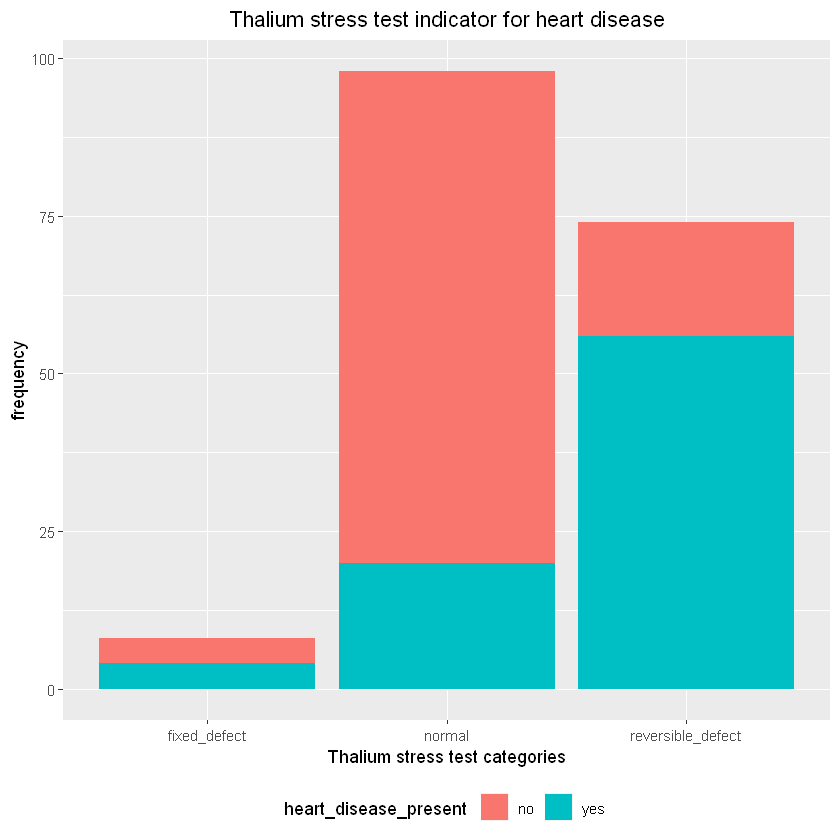

In [30]:
# Distribution of 'thal' variable by Heart disease present

ggplot(train_copy, aes(thal, fill=heart_disease_present)) +
    geom_bar() +
    theme(legend.position='bottom', plot.title=element_text(hjust=0.5)) +
    ggtitle('Thalium stress test indicator for heart disease') +
    xlab('Thalium stress test categories') +
    ylab('frequency')